# Homework #2 Part I:


We need to prove that as a function of $\theta$:
$$
\begin{align*}
&\color{white}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

Firstly, we can rewrite the expression:

$$
\begin{align*}
&\color{white}{}&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

into:

$$
\propto{}  \exp \left(-\frac{1}{2}(\tau+n \phi)\left(\theta-\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2\right)
$$

Then we can denote:
$$
\mu=\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}
$$

Expanding the square:
$$
(\theta-\mu)^2=\theta^2-2 \theta \mu+\mu^2
$$

Substituting $\mu$ back into the expanded form:
$$
\theta^2-2 \theta \frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}+\left(\frac{\tau \theta_0+\phi \sum_{i=1}^n x_i}{\tau+n \phi}\right)^2
$$

Multiplying $-\frac{1}{2}(\tau+n \phi)$ :
$$
-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)
$$

Finally, the given expression can be written as:

$$
\exp\left(-\frac{1}{2}(\tau+n \phi) \theta^2+\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right) \theta-\frac{1}{2}\left(\tau \theta_0+\phi \sum_{i=1}^n x_i\right)^2\left(\frac{1}{\tau+n \phi}\right)\right)
$$

This is a quadratic function of $\theta$, which shows that the given expression is proportional to the provided form.

# Homework #2 Part II:

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
4. How do ***log likelihoods*** and ***posteriors*** differ from each other as a result of ***improper priors*** pdiscussed below] and ***marginal likelihood constants***?

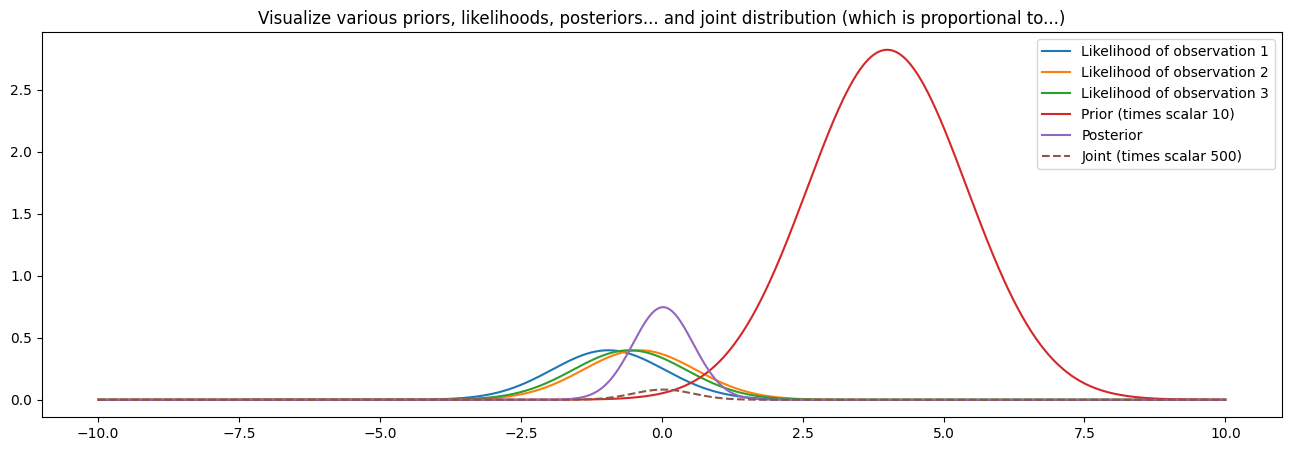

In [7]:
#1

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given parameters for Bayesian analysis
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau = 4, 1/2
parameter_domain = np.linspace(-10, 10, 1001)

# Likelihood calculation for each observation
likelihoods = [stats.norm.pdf(parameter_domain, loc=xi, scale=1) for xi in x]

# Prior distribution
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)

# Joint distribution for the visualization (elementwise multiplication of likelihood and prior)
joint = 500 * np.prod(likelihoods, axis=0) * prior

# Posterior distribution
posterior = stats.norm(loc=(tau*theta_0 + x.sum()) / (tau + n), scale=1 / (tau + n)**0.5).pdf(parameter_domain)

# Plotting
plt.figure(figsize=(16, 5))

# Plot individual likelihoods for each observation
for i, individual_likelihood in enumerate(likelihoods):
    plt.plot(parameter_domain, individual_likelihood, label=f"Likelihood of observation {i+1}")

# Plot other distributions
plt.plot(parameter_domain, 10*prior, label="Prior (times scalar 10)")
plt.plot(parameter_domain, posterior, label="Posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Joint (times scalar 500)")

# Adding legend and title
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors... and joint distribution (which is proportional to...)")

# Show plot
plt.show()

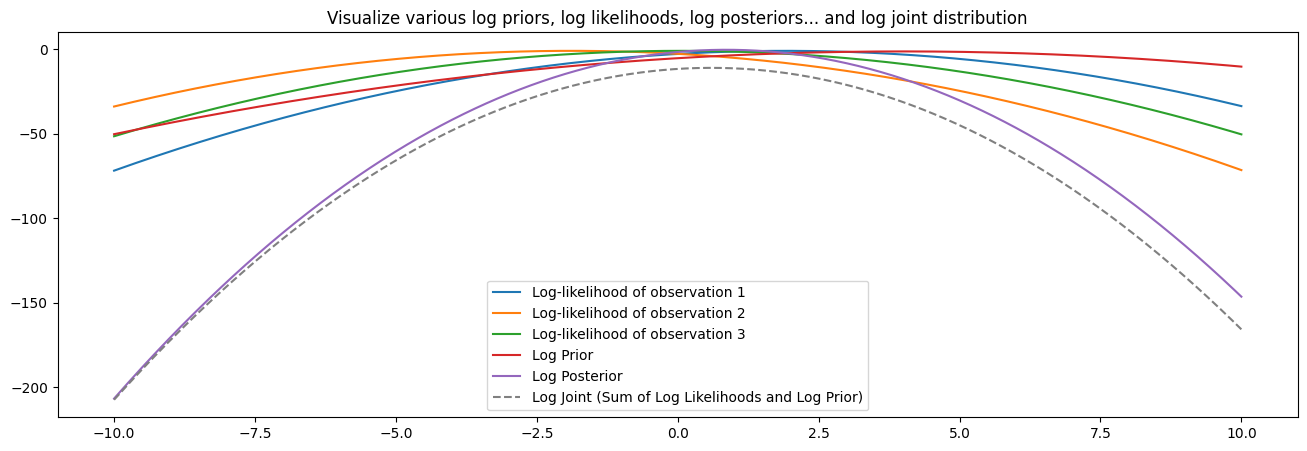

In [19]:
#2
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Given parameters for Bayesian analysis
n = 3
x = stats.norm(loc=0, scale=1).rvs(n)
theta_0, tau, phi = 4, 1/2, 1
parameter_domain = np.linspace(-10, 10, 1001)

# Log likelihood calculation for each observation
log_likelihoods = np.array([stats.norm.logpdf(xi, loc=parameter_domain, scale=1/phi**0.5) for xi in x])

# Summing log-likelihoods for all observations to get the combined log-likelihood
combined_log_likelihood = log_likelihoods.sum(axis=0)

# Log-prior distribution
log_prior = stats.norm.logpdf(parameter_domain, loc=theta_0, scale=1/tau**0.5)

# Log of the joint distribution (log-likelihood + log-prior)
log_joint = combined_log_likelihood + log_prior

# Plotting on a log scale
plt.figure(figsize=(16, 5))

# Plot log likelihoods for each observation
for i, log_likelihood in enumerate(log_likelihoods):
    plt.plot(parameter_domain, log_likelihood, label=f"Log-likelihood of observation {i+1}")

# Plot other distributions on a log scale
plt.plot(parameter_domain, log_prior, label="Log Prior")
plt.plot(parameter_domain, log_posterior, label="Log Posterior")

# Plot log joint distribution (Sum of Log Likelihoods and Log Prior)
plt.plot(parameter_domain, log_joint, linestyle="--", color="gray", label="Log Joint (Sum of Log Likelihoods and Log Prior)")

# Adding legend and title
plt.legend()
plt.title("Visualize various log priors, log likelihoods, log posteriors... and log joint distribution")

# Show plot
plt.show()

# 3. What is the posterior distribution of a normal likelihood with $p(\theta) \propto 1$

Given a normal likelihood function:

$p(x \mid \theta, \phi) = \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}$

and a uniform prior
$p(\theta) \propto 1$, the posterior distribution $p(\theta\mid x)$ is proportional to the likelihood function:

$p(\theta \mid x) \propto \prod_{i=1}^n \sqrt{\frac{\phi}{2 \pi}} e^{-\frac{\phi}{2}\left(x_i-\theta\right)^2}$

By combining exponents and ignoring constant factors, we get:

$p(\theta \mid x) \propto e^{-\frac{\phi}{2} \sum_{i=1}^n\left(x_i-\theta\right)^2}$

This expression can be further simplified using the sum of squares:

$\sum_{i=1}^n\left(x_i-\theta\right)^2 = n(\theta-\bar{x})^2$

Completing the square, we obtain:

$-\frac{\phi}{2} n(\theta-\bar{x})^2$

Therefore, the posterior distribution is a normal distribution:

$\theta \mid x \sim \mathcal{N}(\bar{x}, \frac{\sigma^2}{n})$

where $\bar{x}$ is the sample mean,  $\sigma^2$ is the variance associated with the likelihood function (assuming $\phi = \frac{1}{\sigma^2}$), and $n is the number of observations.


# 4.

**Log Likelihoods**: These are unaffected by the choice of prior, improper or otherwise. They are solely a function of the data and the model parameters. The log likelihood encapsulates how well the model explains the observed data.

**Posterior Distributions**: The posterior is derived from the product of the likelihood and the prior. If the prior is improper, it might lead to an improper posterior, which is not a valid probability distribution. However, if the likelihood is informative enough, it can dominate the impact of the improper prior and yield a proper posterior. The marginal likelihood (evidence) plays a crucial role in normalizing the posterior.

**Marginal Likelihood Constants**: These constants are used to normalize the posterior, ensuring it integrates to one and forms a valid probability distribution. With an improper prior, the marginal likelihood becomes crucial in checking whether the resulting posterior is proper. An informative likelihood can lead to a finite integral, making the posterior proper, while a less informative likelihood might result in an improper posterior.

In summary, while the log likelihood is robust to the choice of prior, the posterior is influenced by both the likelihood and the prior. The marginal likelihood constant ensures that the posterior is a valid probability distribution, especially in the presence of improper priors.





